In [1]:
### 第三章：音高和持续时间

现在，你已经做了几个Note对象，它的时间来深入一点到是什么让一个Note真正的一个Note，即 music21.pitch和music21.duration对象。
#### 音高对象
由于我们已经介绍了Note对象，因此 Pitch对象将变得轻而易举。就像Note在note模块Pitch 中找到对象的方式一样，在pitch模块中找到对象。

让我们创建一个Pitch。就像我们对进行的操作一样Notes，只需使用注释名称对类进行分类，例如B使用升或降的可选符号（分别为＃或-）。

您可以在名称后放置一个八度音阶数字（4 =低高音谱号），也可以不必这样：

In [2]:
from music21 import *
p1 = pitch.Pitch('b-4')

在这里，我们将使用一个更抽象的变量名p1作为第一个变量Pitch，以防万一稍后（通过via .transpose() 或其他方式）更改音高。

就像我们看到的一样，Notes这里有很多属性（又称属性；在讨论差异之前，我们会互换使用该术语）以及描述和更改音高的方法。

In [3]:
p1.octave

4

In [4]:
p1.pitchClass

10

In [5]:
p1.name

'B-'

In [6]:
p1.accidental.alter

-1.0

In [7]:
p1.frequency

466.1637615180899

接下来两个是你可以额外使用的。第一个是一个很完整的“自我解释”，第二个给了`Pitch `一种在MIDI中所表示的值。这是一个从0~127的数字，中音C(C4)的值是60， C#4/Db4 是61，B3是59，以此类推。

In [8]:
p1.nameWithOctave

'B-4'

In [9]:
p1.midi

70

这些属性大都数都可以更改，设置完属性后，Pitch对象将显示出新值所代表的内容

In [10]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

我们熟悉的`.transpose()`方法也将出现Pitch。请记住，p1现在是D#：

In [11]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

在命令行中输入变量名就可以打印该对象，我们也可以用python自带的`repr`来打印对象

In [12]:
repr

<function repr(obj, /)>

实际上Pitch和我们之前学的Note的内容很像，这是因为每个NOte内部都有一个Pitch对象，我们对`note.Note` 对象所做的一切，我们都可以对`note.Note.pitch`对象进行处理：

In [13]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [14]:
csharp.pitch.name

'C#'

In [15]:
csharp.octave

4

In [16]:
csharp.pitch.octave

4

但是，音调对象可以为技术工作提供更多功能，例如，Pitch对象在西班牙语中知道其名称

In [17]:
csharp.pitch.spanish

'do sostenido'

但是Note就没有这个属性

In [18]:
# csharp.spanish

这是您可以使用Pitch对象执行的其他操作。获得清晰的打印效果：

In [19]:
print(csharp.pitch.unicodeName)

C♯


以及获取一些等音(enharmonics(非泛音))

In [20]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


到目前为止，看起来Pitch对象可以完成对象可以做的所有Note 事情以及更多。那么为什么我们需要Note物体呢？这是因为它们也具有Duration属性，我们将在下一节中看到。没有Duration属性，就无法将对象放入度量中或将其显示在屏幕上。
### 用Duration对象设置时间
为了Note占据音乐空间，它必须持续一定的时间。我们称之为时间Note的 Duration。Duration音乐中的物体无处不在。几乎所有对象都具有或可以具有 Duration。一个Duration对象几乎可以表示任何时间跨度。

Duration将对象附加到其他对象（例如a Note或a）时Rest，最好使用它们，但现在，让我们看看我们可以单独使用它们做什么。

Duration对象驻留在duration模块中。创建Duration对象时，可以说出创建对象时的持续时间类型。

在这里，我们将创建一个半音符的持续时间：

In [21]:
halfDuration = duration.Duration('half')

字符串'half'就是`Duration`的一个类型。Music21使用美国的持续时间类型： “whole”, “half”, “quarter”, “eighth”, “16th”, “32nd”, “64th”。注意，对于短于八分音符的持续时间，我们使用数字而不是拼写字符串的全程。Music21还支持不太常用的类型，如“ breve”（2个全音符），“ longa”（4个全音符）和“ maxima”（8个全音符），而短时的如“ 128th”，“ 256th”等等，直到"2048th"

创建a的另一种标准方法Duration是在创建时传递一个数字。该数字代表多少个四分音符(quarter notes)。因此，我们使用2或者2.0来创建二分音符。但是，我们还可以创建Durations不完全是“整个”，“一半”，“四分之一”等标准时长数字。让我们创建一个复附点四分音符(dotted quarter note)，它长1.5个四分音符：

In [22]:
dottedQuarter = duration.Duration(1.5)

就像我们已经看到的Pitch和Note对象一样，Duration对象具有许多属性。最重要的是.quarterLength.我们的 dottedQuarter的quarterLength当然是1.5：我们就是这么设置的。但同样重要的是，该halfDuration对象还具有其QuarterLength设置：

In [23]:
dottedQuarter.quarterLength

1.5

In [24]:
halfDuration.quarterLength

2.0

`.type `属性告诉我们他所拥有的是哪种Duration

In [25]:
halfDuration.type

'half'

In [26]:
dottedQuarter.type

'quarter'

该type属性不能是描述的所有内容， Duration必须在某个位置上music21可以跟踪dottedQuarter变量有一个点的事实（否则它将不具有quarterLength1.5）。您会发现名为的属性.dots：

In [27]:
halfDuration.dots

0

In [28]:
dottedQuarter.dots

1

属性dots, type, 和 quarterLength实际上都是叫做"properties"的特殊属性。这种特性有时候会很好用。让我们改变在dottedQuarter 上dots的数字并看看对于quarterLength 发生了什么变化

In [29]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength


1.75

In [30]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [31]:
dottedQuarter.dots = 4
dottedQuarter.quarterLength

1.9375

如果我们修改了quarterLength ，type和dots也会随着发生变化

In [71]:
#dottedQuarter.quarterLength = 2
dottedQuarter.type = 'quarter'

In [73]:
#dottedQuarter.dots = 0
dottedQuarter.quarterLength

1.0

QuarterLength是music21里的一个很重要的属性。我们会把他简写成qL或者qLs。几乎所有在music21里的时间测量都会用到它。

Music21还可以处理其他值，比如表示4/5个半音的0.8,或者表示三连音的1/3

创建三连音的时候需要小心，因为在python2中两个整数相除，最终会取回数字的整数部分。这里为了表示整数除法我们用到`//`，这在python2和3中都表示着取整。

In [34]:
8//3

2

In [35]:
1//3

0


想要得到小数的话，你需要保证至少有一位数字是小数

In [36]:
8.0/3.0

2.6666666666666665

In [37]:
1.0/3

0.3333333333333333

您可以现在就尝试一下三连音，不过我们接下来也会讲到。

### 返回我们的Note
因此，现在您可以看到使用Note对象的优势：它们既具有.pitch包含Pitch对象的属性，又具有包含对象的.duration属性。默认Pitch为Note是C（意义C4），默认Duration为1.0，或四分音符。

In [38]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [39]:
n1.duration

<music21.duration.Duration 1.0>

我们还能这么玩

In [40]:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

相应的属性也会相应改变

In [41]:
n1.duration.type

'half'

In [42]:
n1.duration.dots

1

In [43]:
n1.pitch.name

'E-'

In [44]:
n1.pitch.accidental

<accidental flat>

In [45]:
n1.octave

5

我们已经说过，Pitch也可以在Note对象本身上调用的某些属性。对于以下最重要的属性Duration也是如此：

In [46]:
n1.name

'E-'

In [47]:
n1.quarterLength

3.0

现在让我们将QuarterLength更改回1.0

In [48]:
n1.quarterLength = 1.0

Notes可以做物体Pitch或Duration对象都做不到的事情。例如，他们可以有歌词。让我们为添加一些歌词 Notes。您只需设置lyric属性即可轻松设置对象。（作为参考，该lyric属性实际上是GeneralNote属性，这是一个“基类”，该类从其Note“继承”。换句话说， Note类从GeneralNote获得lyric属性。但这并不是太重要。）

In [49]:
otherNote = note.Note("F6")
otherNote.lyric = "I'm the Queen of the Night!"

但是，让我们做一些更复杂的事情。在这里我使用Note的 `addLyric()` 方法添加了多个歌词 。除了添加简单的String之外，我还将添加音符本身及其名称作为歌词pitchClassString。

In [50]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

最终，将quarterLength的内容作为缀为"QL"的字符串，也放入歌词中。

In [51]:
n1.addLyric('QL: %s' % n1.quarterLength)

最终用`show()`查看我们的成果

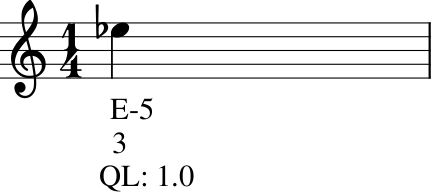

In [52]:
n1.show()

如果现在编辑 quarterLength 属性，我们仍然可以更改Note的Duration。但是歌词不会进行更改了。

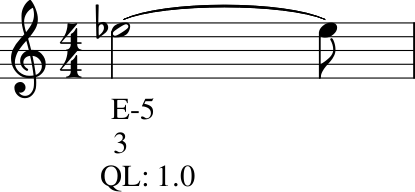

In [53]:
n1.quarterLength = 2.5
n1.show()

In [54]:
n1.show('midi')